# Day 3 - Wells, advanced plotting, and NumPy
- Continuation of material from Session 2
- Mapping using Matplotlib
- Subsurface data in Python (2 hour 15 minutes)
- Importing and navigating well data (las files) with Lasio
- Statistical analysis of well data (descriptive statistics, data histograms, plots with lasio and pandas
- Petrophysical investigation with data exploration
   
- Questions (30 minutes)

### Maps with Matplotlib

In [160]:
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive #mounting drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Geoscientists make maps - so let's use matplotlib to do that. We're going to load in a surface from the offshore Canada Penobscot seismic [dataset](https://terranubis.com/datainfo/Penobscot) released by Nova Scotia Dept. of Energy and dGB Earth Sciences.

[Agile Scientific](https://agilescientific.com) had a really nice and detailed blog about the same examples but we're goig to make contouring a little simpler.

In [171]:
#Let's load our data
seabed = np.load(r"gdrive/My Drive/Data/Penobscot_Seabed.npy") #using Numpy's np.load features which is similar to pd.read()
seabed *= -1  # inverting seabed to make visuals more clean

The data we just loaded is a `numpy array`, which is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers

The fastest and simplest way to visualize an `array` as a map/image is to use `matplotlib.imshow()`

Before we begin, you can refresh what we talked about prebiously regarding Matplotlib figure Object Oriented layout syntax (as approached to Matlab approach)

Look at this figure that describes the **"Anatomy of a Matplotlib figure"** Note in this figure, everything that is blue is an `artist element`

Read this:This article is a great place to [learn about the components of a matplotlib figure\.](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)Here is the key diagram:![Anatomy of a figure](https://matplotlib.org/_images/anatomy.png)

As we build these maps below, continually refer back to the figure above for some help!

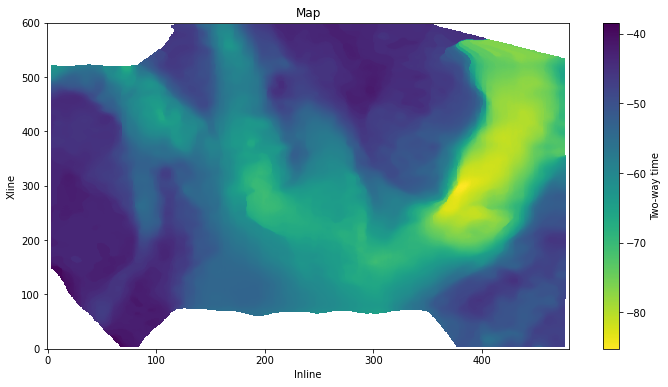

In [204]:
#Let's make a figure using Matplotlib and organize it with object oriented approach

#setting up the figure
fig = plt.figure(figsize=(12,6)) #defining fig which is the space of our figure
ax = fig.add_subplot() #adding an subplot "axes" called ax to our figure space

#placing a plot using the imshow() function and passing some arguments.
plt.imshow(seabed, aspect=0.5, origin='lower', #the origin=lower argument is re-orienting our figure (north is up now)
           cmap='viridis_r') #cmap refers to the color map we want to use for plotting and viridis_r is the reverse of the viridis color map.


#adding a title and colorbar legend and axis labels
plt.title('Map') # adding the title to the plt
plt.colorbar(label="Two-way time") #adding a color bar
#plt.grid()
ax.set_xlabel("Inline") #labeling x axis
ax.set_ylabel("Xline") #labeling y axis

#showing plot
plt.show()

Now maybe we actually want to see it as contours. To do that we can use the `plt.contour()` function that will take our 2D arraw and contour it up. You can pass lots of arguments to it to control the look and we'll check out a few.

An obvious key argument is the number of contours we want

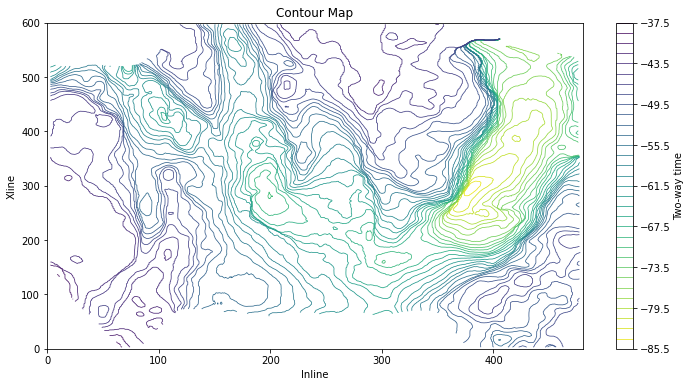

In [207]:
cn = 40 #defining a variable that will be the number of contours (not the contour interval)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()

# let's use the .contour function
plt.contour(seabed, cn, linewidths=0.75, cmap='viridis_r')
#plt.contour(seabed, ci, linewidths=0.75, linestyles='solid', colors='k') #linestyle = solid is to avoid dashed lines

plt.title('Contour Map')
plt.colorbar(label="Two-way time")
ax.set_xlabel("Inline")
ax.set_ylabel("Xline")

plt.show()

Let' say we want to fill those contours (not the same as a raster) we can do that with the `plt.contourf()` function all the arguments are the same.

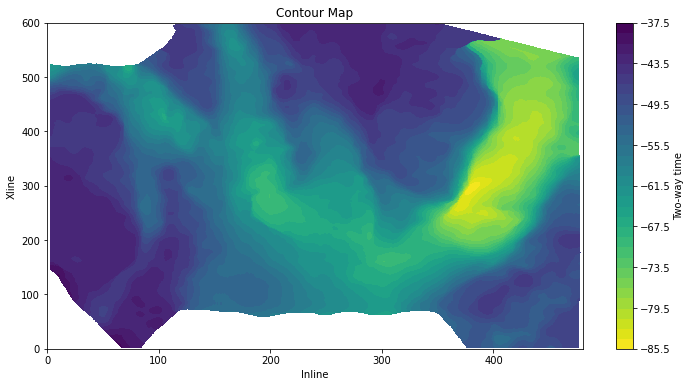

In [208]:
cn = 40 #defining a variable that will be the number of contours (not the contour interval)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()

#note here we are using the filled contour - .contourf function
plt.contourf(seabed, cn, cmap='viridis_r')

plt.title('Contour Map')
plt.colorbar(label="Two-way time")


ax.set_xlabel("Inline")
ax.set_ylabel("Xline")
plt.show()

Let's combine the two and show filled contours with contour lines

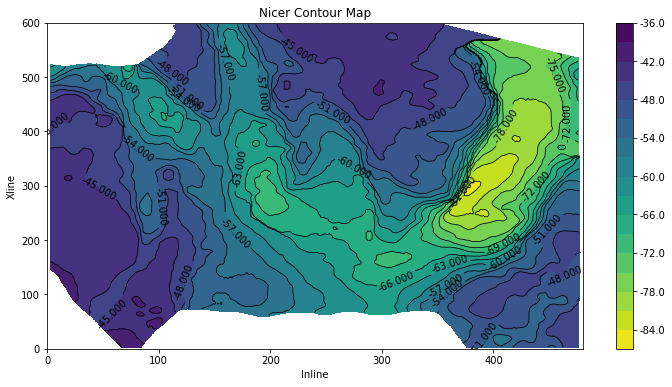

In [209]:
cn = 15 #defining a variable that will be the number of contours (not the contour interval)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()

cf = plt.contourf(seabed, cn, cmap='viridis_r') #adding a plot that is the filled contours

cs = plt.contour(seabed, cn, linewidths=0.75,linestyles='solid', colors='k') #adding a plot that is the line contours

plt.clabel(cs, inline=1,fontsize=10) #adding labels to the contour lines. Using inline=1 to have labels inline 

plt.title('Nicer Contour Map')
#plt.colorbar(label="Two-way time") legend for contour lines
cbar = plt.colorbar(cf,format='%.1f') #using the %.1f for 1 sig fig. using cf to indicate that we want the colorbar for the filled contour plot

ax.set_xlabel("Inline")
ax.set_ylabel("Xline")
plt.show()

Let's save our figure!

In [ ]:
#Save our figure as a PNG
fig.savefig('gdrive/My Drive/MAPTEST.png')

What were were just mapping with was a numpy `array`. Here is an example of how to convert a XYZ dataframe to an NumPy array for plotting. Again an `array` is grid of values indexed by a tuple.

See below for a simple example making a dataframe from a list of xyz tubles and using the numpy `df.to_numpy()` function to transform it to a numpy array that we could use to map!

In [172]:
import pandas as pd  


#initializing the dataframe  
info = pd.DataFrame([[17, 62, 35],[25, 36, 54],[42, 20, 15],[48, 62, 76]], columns=['x', 'y', 'z']) #We are creating a dataframe from a list of tuples and giving the column the x,y,z labels 

#print what the dataframe would look like
print('DataFrame\n----------\n', info) 


#convert the dataframe to a numpy array using the .to_numpy() fuction
arr = info.to_numpy() #info refers to our prior dataframe

#print what the array would look like
print('\nNumpy Array\n----------\n', arr) 

DataFrame
----------
     x   y   z
0  17  62  35
1  25  36  54
2  42  20  15
3  48  62  76

Numpy Array
----------
 [[17 62 35]
 [25 36 54]
 [42 20 15]
 [48 62 76]]


Here is an example of taking our array "arr" that we created in the previous cell, and using imshow on it.

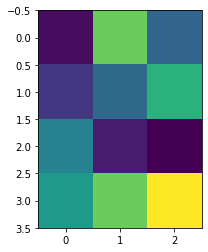

In [210]:
#Make a simple imshow plot from the numpy arrawy
plt.imshow(arr)

# Well data in Python

Key to working with well data in Python is `Lasio` - a library specifically designed to work with LAS files. You can check out details [here](https://lasio.readthedocs.io/en/latest/) 

Another key library is `Welly` that builds on `lasio` and boosts functionality for visualizations and analysis.

In [63]:
# Just to be safe, let's reinstall lasio - if it's already installed it will just move on:
!pip install lasio
!pip install welly

     |████████████████████████████████| 79 kB 3.5 MB/s 
     |████████████████████████████████| 90 kB 8.0 MB/s 


In [3]:
#Let's import pacakges
import lasio
import welly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive #mounting drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Let's load an las file using the `lasio.read()` function and take a look at the curves that are included using the `.curves` function!

In [4]:
#Lasio includes a read function just like Pandas
#las = lasio.read(r"gdrive/My Drive/Data/L-30.las")
las = lasio.read(r"gdrive/My Drive/Data/15-9-19_SR_COMP.LAS")

Ok let's take the a look at the content, particularly the curves and header information. 

We can use the `.well` function to see the description of information within the header. 

In [5]:
# again it will work without the print, just much clearner
print(las.well)

Mnemonic  Unit  Value       Description       
--------  ----  -----       -----------       
STRT      M     102.1568    Top Depth         
STOP      M     4636.514    Bottom Depth      
STEP      M     0.1524      Depth Increment   
NULL            -999.25     Null Value        
FLD             Q15         Field Name        
WELL            15/9-19     NAME              
WBN             15/9-19 SR  WELLBORE          
NATI            NOR         COUNTRY           
CTRY            NOR         COUNTRY           
COMP            STATOIL     OPERATOR          
PDAT            MSL         PERM DATUM        
COUN            NORTH SEA   RIG NAME          
STAT            NORWAY      STATE             
PBWE            15/9-19     PB WELL ID        
APIN            15/9-19 SR  PB WELLBORE ID    
PBWS            ALL         PB WELL NAME SET  


If we wanted to use clean this up a little more and combine the description and the mnemonics and see the values, we could write a for loop and use an `fstring` with variables. See below on this helpful script that [Andy McDonald](https://www.andymcdonald.scot) came up with

In [6]:
#simple for loop to extract the values from the well header
for item in las.sections['Well']: #las.section contains the header and curve information accessible as one function
  print(f"{item.descr} ({item.mnemonic}): \t\t {item.value}") #printing an fstring, and adding variables that relate to items specific items int the .section (description, mnemonic, values). \t\t is adding tab spacing  

Top Depth (STRT): 		 102.1568
Bottom Depth (STOP): 		 4636.514
Depth Increment (STEP): 		 0.1524
Null Value (NULL): 		 -999.25
Field Name (FLD): 		 Q15
NAME (WELL): 		 15/9-19
WELLBORE (WBN): 		 15/9-19 SR
COUNTRY (NATI): 		 NOR
COUNTRY (CTRY): 		 NOR
OPERATOR (COMP): 		 STATOIL
PERM DATUM (PDAT): 		 MSL
RIG NAME (COUN): 		 NORTH SEA
STATE (STAT): 		 NORWAY
PB WELL ID (PBWE): 		 15/9-19
PB WELLBORE ID (APIN): 		 15/9-19 SR
PB WELL NAME SET (PBWS): 		 ALL


Now let's take a look at what's in the file. For this we can use helpful lasio function `.curves` to actually print out what curves are present.

In [7]:
print(las.curves) # try this with and without the print command. Using print makes it clearner.

Mnemonic  Unit  Value         Description                       
--------  ----  -----         -----------                       
DEPT      M     00 001 00 00  1  DEPTH                          
AC        US/F                2  Sonic Transit Time (Slowness)  
CALI      IN                  3  Caliper                        
DEN       G/CC                4  Bulk Density                   
GR        GAPI                5  Gamma Ray                      
NEU       %                   6  Neutron Porosity               
RDEP      OHMM                7  Deep Resistivity               
RMED      OHMM                8  Medium Resistivity             


Again using a foreloop if we wanted to extract the information on the curve mnemonics we could use a simple foreloop.

In [8]:
#Write a simple for loop to return the curve names

for curve in las.curves:
    print(curve.mnemonic)

DEPT
AC
CALI
DEN
GR
NEU
RDEP
RMED


A couple more helpful things about Lasio functions:
- `las.delete_curve['XX']` can be used to remove curves from the las file
- `las.write(..filepath.las)` can be used to write out las files
- the combination of both can be very helpful to bring in, clean, and output files again

Another very useful features of Lasio is that it's quick and simple to convert an las file to a pandas dataframe for quick analyses using the `las.df()` function. There are a couple things to remember though:

- lasio imports data by default as numpy arrays
- default the dpeth is used for the index
- by default the first column (depth) will be used as the index when the file is converted to a dataframe.

In [9]:
# if we use the las.index function we can see the array of depth values
las.index

array([ 102.1568,  102.3092,  102.4616, ..., 4636.2092, 4636.3616,
       4636.514 ])

Let's convert our imported well to a dataframe:

In [10]:
# Here we are converting the las file to a dataframe
well = las.df()
well.head()

#Note that this conversion default to setting Depth as the index in the dataframe

AC  CALI  DEN      GR  NEU  RDEP  RMED
DEPT                                            
102.1568 NaN   NaN  NaN  5.3274  NaN   NaN   NaN
102.3092 NaN   NaN  NaN  5.8235  NaN   NaN   NaN
102.4616 NaN   NaN  NaN  6.5228  NaN   NaN   NaN
102.6140 NaN   NaN  NaN  7.2285  NaN   NaN   NaN
102.7664 NaN   NaN  NaN  9.5020  NaN   NaN   NaN

In [11]:
#Now we can use the functionatlity of Pandas to describe the data in the logs
well.describe()

AC             CALI              DEN                GR  \
count  7007.0000000000  7007.0000000000  7084.0000000000  28117.0000000000   
mean     79.4987138576     9.6110677608     2.4490550113     71.9867977096   
std      18.3907046086     1.0197505838     0.1651217313     32.9227797788   
min       1.0251000000     6.0000000000     1.9430000000      2.7661000000   
25%      66.1543500000     9.1429000000     2.3199750000     50.2552000000   
50%      74.6619000000     9.5894000000     2.5056000000     74.9985000000   
75%      93.3045500000     9.9048000000     2.5851250000     92.3438000000   
max     181.8139000000    20.3304000000     3.0013000000    304.3337000000   

                   NEU              RDEP              RMED  
count  7096.0000000000  12223.0000000000  12223.0000000000  
mean     20.1171655440      2.4383820911      2.3867810603  
std      14.7295300913      6.6312017517      5.7357311055  
min       2.1783000000      0.2503000000      0.1790000000  
25%      10.6313500000      0.9880000000      0.8478500000  
50%      15.7185500000      1.5361000000      1.4908000000  
75%      25.0673750000      2.4340500000      2.4154000000  
max     146.3474000000    198.5371000000    168.6044000000

Because we coverted the las to a dataframe, we can use all the benefits and easy of plotting in Pandas!

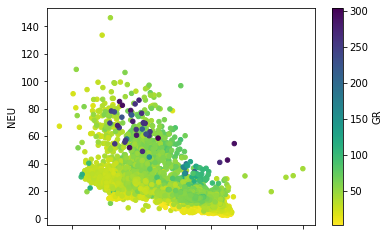

In [16]:
import pandas as pd
well.plot(kind = 'scatter', x = 'DEN', y = 'NEU', c='GR', colormap='viridis_r')

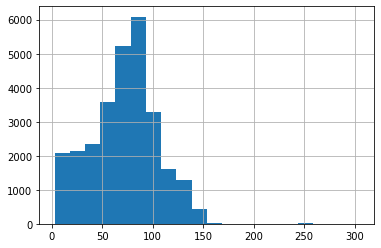

In [17]:
well.GR.hist(bins=20)

### Using Welly for more file manipulation and plotting
- Welly is another package that helps us manipulate well data. 
- It provides lots of user friendly visuals for well header and curve data and simplifies some quick plotting too.

In [21]:
from welly import Well
from welly import Project

well = Well.from_las(r"gdrive/My Drive/Data/P-129.LAS") 

We can simply call the well object we just created and welly will give a nice summary!

In [22]:
well #simply calling the well with have Welly print out   data for us! 

Well(uwi: 'Long = 63* 45'24.460  W', name: 'Kennetcook #2', 24 curves: ['CALI', 'HCAL', 'PEF', 'DT', 'DTS', 'DPHI_SAN', 'DPHI_LIM', 'DPHI_DOL', 'NPHI_SAN', 'NPHI_LIM', 'NPHI_DOL', 'RLA5', 'RLA3', 'RLA4', 'RLA1', 'RLA2', 'RXOZ', 'RXO_HRLT', 'RT_HRLT', 'RM_HRLT', 'DRHO', 'RHOB', 'GR', 'SP'])

If we want the full header, we can use the handy `.header` function built into Welly.

You can quickly conver this `.header` information to a dataframe and use or export if trying organize data.

In [24]:
well.header

original_mnemonic  mnemonic   unit                        value  \
0               VERS      VERS                                 2.0   
1               WRAP      WRAP                                 YES   
2               STRT      STRT      M                       1.0668   
3               STOP      STOP      M                    1939.1376   
4               STEP      STEP      M                       0.1524   
5               NULL      NULL                             -999.25   
6               COMP      COMP         Elmworth Energy Corporation   
7               WELL      WELL                       Kennetcook #2   
8                FLD       FLD                       Windsor Block   
9                LOC       LOC             Lat = 45* 12' 34.237" N   
10              PROV      PROV                         Nova Scotia   
11               UWI       UWI             Long = 63* 45'24.460  W   
12               LIC       LIC                               P-129   
13              CTRY      CTRY                                  CA   
14              DATE      DATE                         10-Oct-2007   
15              SRVC      SRVC                        Schlumberger   
16              LATI      LATI    DEG                                
17              LONG      LONG    DEG                                
18              GDAT      GDAT                                       
19              SECT      SECT                         45.20 Deg N   
20              RANG      RANG                              PD 176   
21              TOWN      TOWN                         63.75 Deg W   
22              DEPT      DEPT      m                                
23              CALI      CALI     in                                
24              HCAL      HCAL     in                                
25               PEF       PEF                                       
26                DT        DT  us/ft                                
27               DTS       DTS  us/ft                                
28          DPHI_SAN  DPHI_SAN  m3/m3                                
29          DPHI_LIM  DPHI_LIM  m3/m3                                
30          DPHI_DOL  DPHI_DOL  m3/m3                                
31          NPHI_SAN  NPHI_SAN  m3/m3                                
32          NPHI_LIM  NPHI_LIM  m3/m3                                
33          NPHI_DOL  NPHI_DOL  m3/m3                                
34              RLA5      RLA5  ohm.m                                
35              RLA3      RLA3  ohm.m                                
36              RLA4      RLA4  ohm.m                                
37              RLA1      RLA1  ohm.m                                
38              RLA2      RLA2  ohm.m                                
39              RXOZ      RXOZ  ohm.m                                
40          RXO_HRLT  RXO_HRLT  ohm.m                                
41           RT_HRLT   RT_HRLT  ohm.m                                
42           RM_HRLT   RM_HRLT  ohm.m                                
43              DRHO      DRHO  g/cm3                                
44              RHOB      RHOB  g/cm3                                
45                GR        GR   gAPI                                
46                SP        SP     mV                                
47                     UNKNOWN                                       

                                                descr  section  
0                                                      Version  
1                                                      Version  
2                                         START DEPTH     Well  
3                                          STOP DEPTH     Well  
4                                                STEP     Well  
5                                          NULL VALUE     Well  
6                                             COMPANY     Well  
7                                                WEL

In [26]:
#To create a dataframe from the well header.
dfh=well.header #create a dataframe that contains the information of well.header
dfh.head() #viewing the first few rows of the dataframe
# this could be exported with the pd.to_csv function

original_mnemonic mnemonic unit      value        descr  section
0              VERS     VERS             2.0               Version
1              WRAP     WRAP             YES               Version
2              STRT     STRT    M     1.0668  START DEPTH     Well
3              STOP     STOP    M  1939.1376   STOP DEPTH     Well
4              STEP     STEP    M     0.1524         STEP     Well

Using the `.data` function allows us to have more detail on the curves contained including their mnemonics, units, depth range, step, and count. The count of values helps us get an initial view of how much data each curve has.

In [28]:
well.data

{'CALI': Curve(mnemonic=CALI, units=in, start=1.0668, stop=1939.1376, step=0.1524, count=[12718]),
 'DPHI_DOL': Curve(mnemonic=DPHI_DOL, units=m3/m3, start=1.0668, stop=1939.1376, step=0.1524, count=[12718]),
 'DPHI_LIM': Curve(mnemonic=DPHI_LIM, units=m3/m3, start=1.0668, stop=1939.1376, step=0.1524, count=[12718]),
 'DPHI_SAN': Curve(mnemonic=DPHI_SAN, units=m3/m3, start=1.0668, stop=1939.1376, step=0.1524, count=[12718]),
 'DRHO': Curve(mnemonic=DRHO, units=g/cm3, start=1.0668, stop=1939.1376, step=0.1524, count=[12718]),
 'DT': Curve(mnemonic=DT, units=us/ft, start=1.0668, stop=1939.1376, step=0.1524, count=[10850]),
 'DTS': Curve(mnemonic=DTS, units=us/ft, start=1.0668, stop=1939.1376, step=0.1524, count=[10850]),
 'GR': Curve(mnemonic=GR, units=gAPI, start=1.0668, stop=1939.1376, step=0.1524, count=[12718]),
 'HCAL': Curve(mnemonic=HCAL, units=in, start=1.0668, stop=1939.1376, step=0.1524, count=[2139]),
 'NPHI_DOL': Curve(mnemonic=NPHI_DOL, units=m3/m3, start=1.0668, stop=1939.1

Welly allows us to extract simple a clear information "headers" from individual curves by subsampling the well.data information.

In [29]:
# we can gain similar information from the GR curve oject
gr = well.data['GR'] #Essentially we're creating a "variable" called gr that is defined as the range of information about the GR curve from the welly data function
gr

Curve(mnemonic=GR, units=gAPI, start=1.0668, stop=1939.1376, step=0.1524, count=[12718])

### Let's look at some well plots with Welly. 

To start let's look at the super helpful `welly.plot` function! 

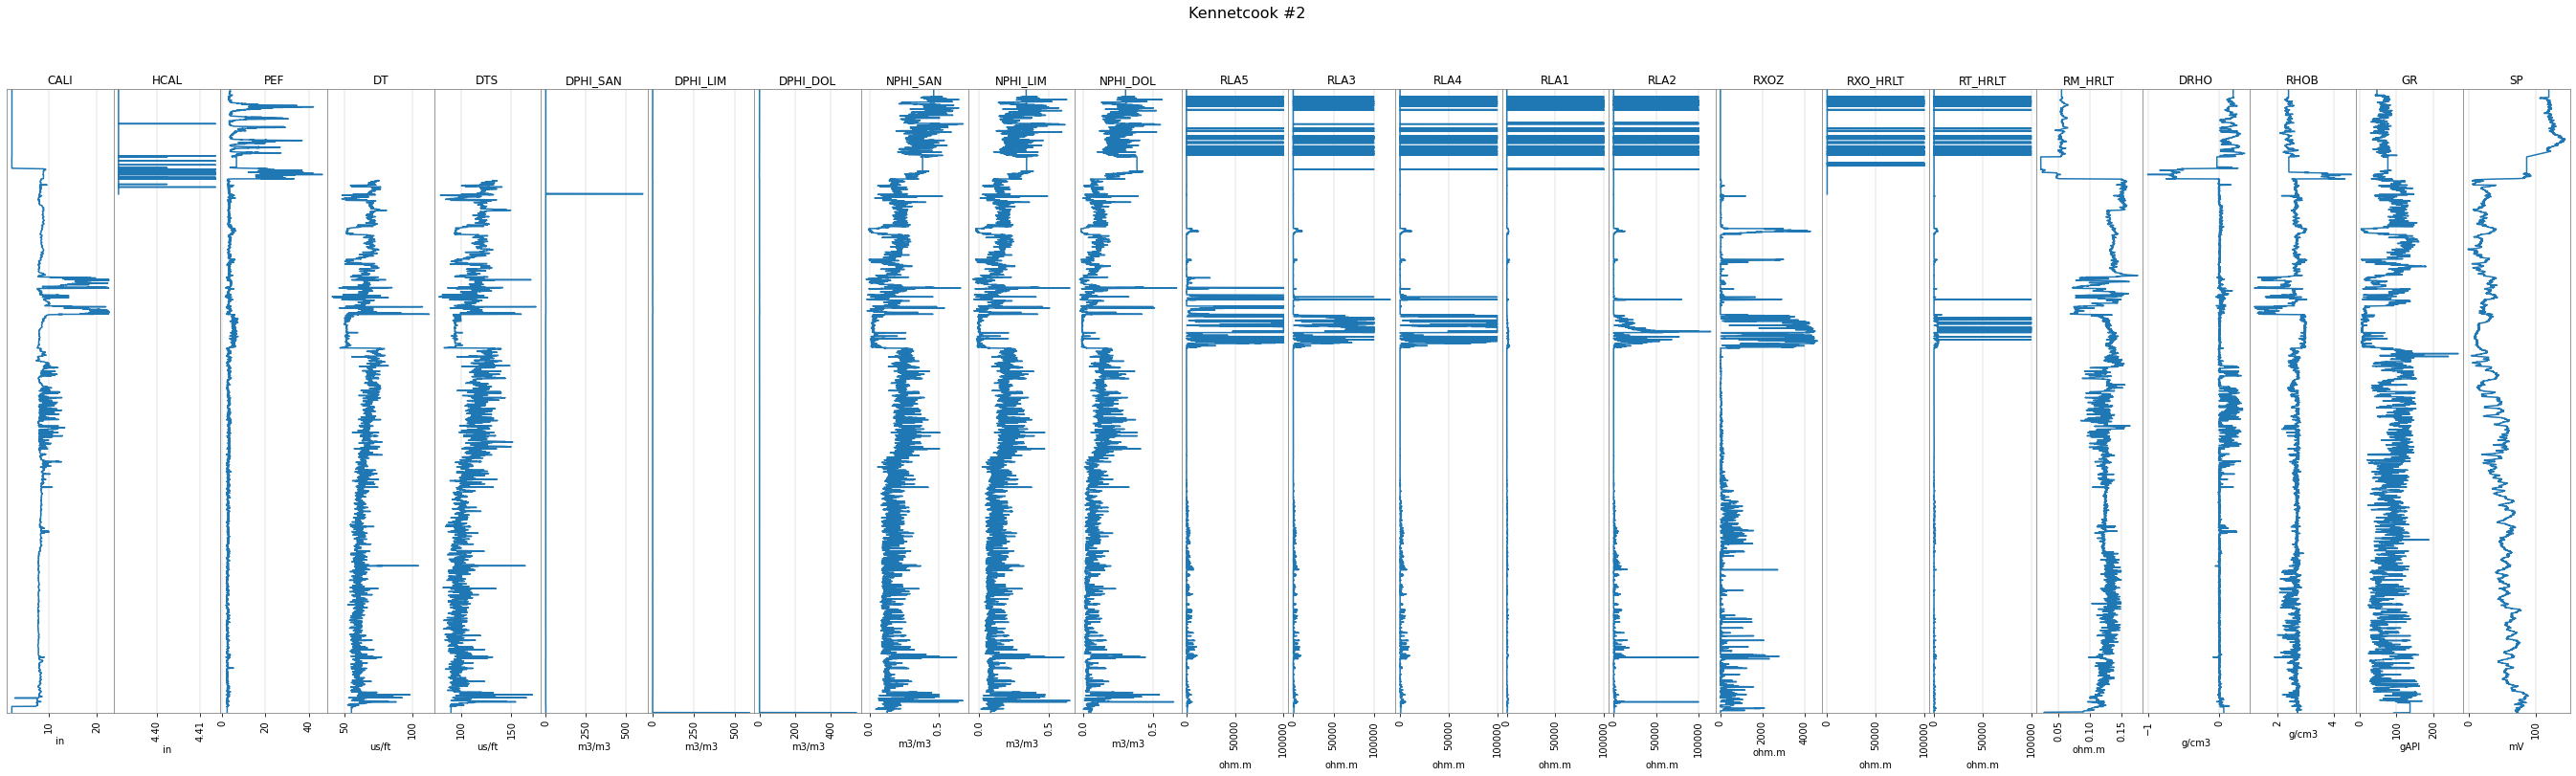

In [30]:
#using the well.plot function to plot a figure of all of our well logs
well.plot()

That's a lot of curve and they are long. Let's trim what logs we see and how much of them we see. 

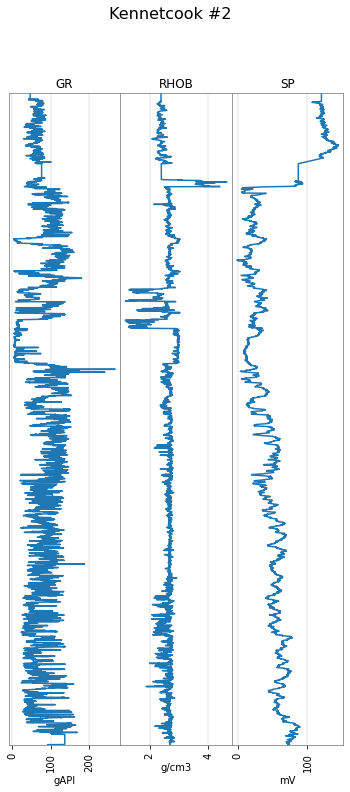

In [130]:
#That was alot of plots, let's reduce what we see using the tracks function and give it a list of curve
#tracks are individual columns in our plots

#let's make a list of tracks we want to see:
tracks=['GR','RHOB', 'SP']
w.plot(tracks = tracks) # you could type your tracks directly into the () and bypass the tracks. The tracks list is helpful if you looping through many well and want to export the figures

In welly, the `basis` is the unique depth range for every curve, where it is present...this is a super helpful feature!

In [83]:
#We can see that GR is present over the range 1 - 1939
gr.basis

array([1.0668000e+00, 1.2192000e+00, 1.3716000e+00, ..., 1.9388328e+03,
       1.9389852e+03, 1.9391376e+03])

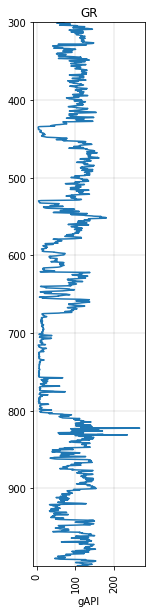

In [190]:
#We plot the well and use the basis to control how much of the well we see
gr.to_basis(start=300, stop=1000).plot() #Try changing the start and stop depths to limit the visualization

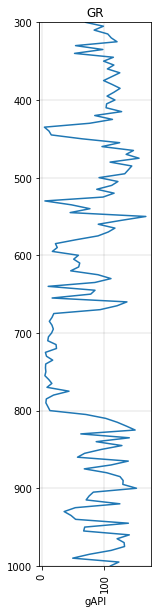

In [193]:
#Let's say we wanted to subsample our data taking every 5th step
gr.to_basis(start = 300, stop=1000, step=5).plot()

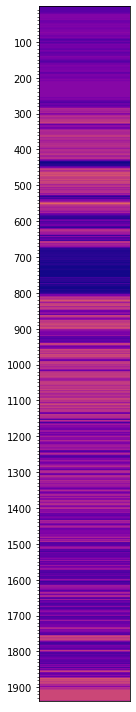

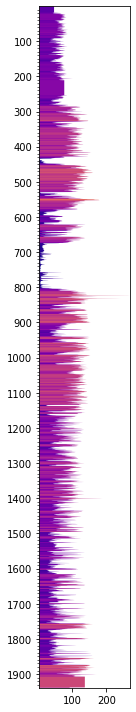

In [33]:
#Another nice and helpful plot that welly can generate is the 
gr.plot_2d(cmap='plasma') #Showing the 2D image plot
gr.plot_2d(cmap='plasma', curve=True) # Adding the curve cutout on top

### Advanced well visualizations

There are many styles of advanced well log plots that can be made. Here we're trying to give you an introduction to some of them! Many of the plots shown here build on the work by [Agile Scientific](https://agilescientific.com) and [Andy McDonald](https://www.andymcdonald.scot) who've made their code avilable!

In [41]:
#Let's load in a file using Lasio
las = lasio.read(r"gdrive/My Drive/Data/15-9-19_SR_COMP.LAS") #Loading an las file with Lasio
df = las.df() #converting the imported well data to a pandas dataframe called well
df.head() #printing out the df header

AC  CALI  DEN      GR  NEU  RDEP  RMED
DEPT                                            
102.1568 NaN   NaN  NaN  5.3274  NaN   NaN   NaN
102.3092 NaN   NaN  NaN  5.8235  NaN   NaN   NaN
102.4616 NaN   NaN  NaN  6.5228  NaN   NaN   NaN
102.6140 NaN   NaN  NaN  7.2285  NaN   NaN   NaN
102.7664 NaN   NaN  NaN  9.5020  NaN   NaN   NaN

You can see that the index of this dataframe was set to depth (lasio does this by default). Let's reset the dataframe so that depth is a column and no long the index (we want to use depth in some figures variations)

Also, let's rename the depth column for clarity

In [43]:
df.reset_index(inplace=True) # resetting the index and locking that 'in place"

df.rename(columns={'DEPT':'DEPTH'}, inplace=True) #using the slicing index within the renaming function to say rename from DEPT to DEPTH

We can see there are quite a few NaN values in our data table apart from the GR. This is pretty normal, but it would be nice to get a visual of where the data is for each curve. 

We can use a quick function in matplotlib to build the subplots (all the curves) to get an idea of where data is for each curve.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f846cb31610>,
      dtype=object)

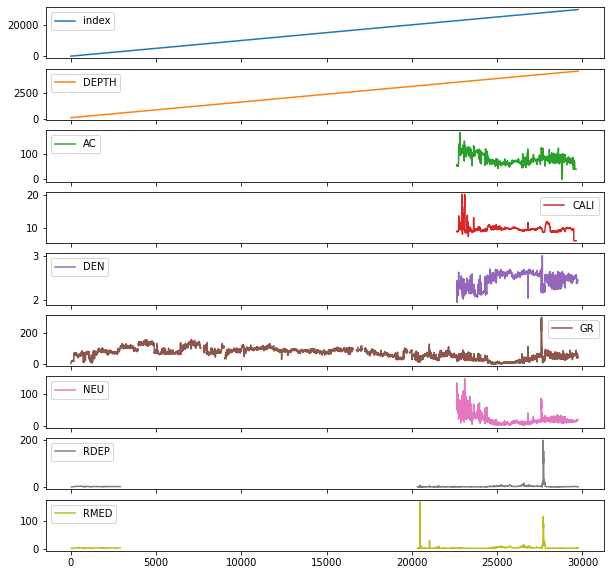

In [47]:
#note, code here is all one line - broken out to add comments.

df.plot( #opening up a line plot (default when calling "plot")
    subplots=True, # by saying subplots=True, matplolib automatically stacks a line plot for each of our dataframe columns
    figsize=(10,10)) #settig the figure size

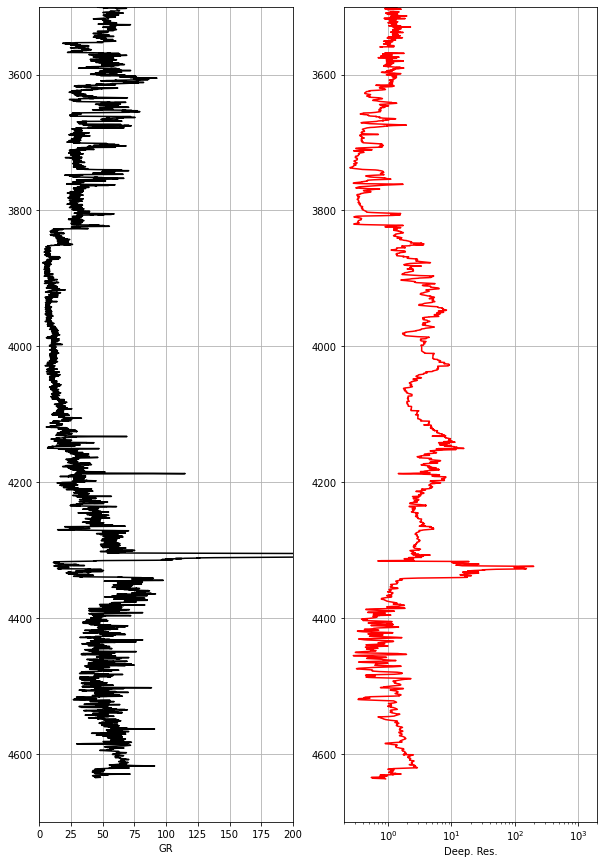

In [52]:
fig = plt.subplots(figsize=(10,15))

#set up the plot axes. We are setting two axes so two subplots.
# We are setting up the plot to be 1 row but two columns (one column for each log)
ax1 = plt.subplot2grid((1,2), (0,0), rowspan=1, colspan=1) #the first coordinate (1,2) says we want 1 row, two columns, and the second coordinate is in index position. First column is 0
ax2 = plt.subplot2grid((1,2), (0,1), rowspan=1, colspan=1) # the index position is (0,1) because this plot will be in the second column. (remember 0-based indexing)

ax1.plot('GR', 'DEPTH', data=df, color='black') #call the data from the well dataframe
ax1.set_xlabel('GR') #Assign a track title
ax1.set_xlim(0,200) # change the limits for the curve being plotted
ax1.set_ylim(4700,3500) # set the depth range
ax1.grid() #display the grid

ax2.plot('RDEP', 'DEPTH', data=df, color='red') #call the data from the well dataframe
ax2.set_xlabel('Deep. Res.') #Assign a track title
ax2.set_xlim(0.2,2000) # change the limits for the curve being plotted
ax2.semilogx() # setting the x axis as log while y stays linear
ax2.set_ylim(4700,3500) # set the depth range
ax2.grid() #display the grid


# More plots for subsurface analysis - logs and facies

We saw some nice ways to load and manipulate well data with Lasio and Welly and make some nice plots. Now let's introduce a few more examples of libraries that could really help for subsurface analysis!

Commonly geoscientists will be looking at multidimensional data. Wells with multiple logs represent a multidimensional data space. Now somtiems we want evaluate the data as well logs plots, but at times, we care about evaluating trends across properties and wells and for that we need to view them differently.

We're going to load in the Force Facies Machine Learning Dataset that has lots of well and lithofacies information and start seeing quick ways to assess that data and summarize multidimensional data using another library called `seaborn`

`Seaborn` is a hugely powerful library for complex visuals, particularly for analysis of multi dimensional datasets like wells! Check it out [here](https://seaborn.pydata.org)

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import math
import missingno as msno
import numpy as np

In [56]:
#Load Force ML facies dataset
data = pd.read_csv(r"gdrive/My Drive/Data/xeek_train_subset.csv")
data.head()

WELL  DEPTH_MD         X_LOC      Y_LOC        Z_LOC         GROUP  \
0  15/9-13   494.528  437641.96875  6470972.5 -469.5018311  NORDLAND GP.   
1  15/9-13   494.680  437641.96875  6470972.5 -469.6538086  NORDLAND GP.   
2  15/9-13   494.832  437641.96875  6470972.5 -469.8057861  NORDLAND GP.   
3  15/9-13   494.984  437641.96875  6470972.5 -469.9577942  NORDLAND GP.   
4  15/9-13   495.136  437641.96875  6470972.5 -470.1097717  NORDLAND GP.   

  FORMATION          CALI  RSHA          RMED  ...           ROP  DTS  DCAL  \
0       NaN  19.480834961   NaN  1.6114097834  ...  34.636409760  NaN   NaN   
1       NaN  19.468799591   NaN  1.6180702448  ...  34.636409760  NaN   NaN   
2       NaN  19.468799591   NaN  1.6264585257  ...  34.779556274  NaN   NaN   
3       NaN  19.459281921   NaN  1.6215940714  ...  39.965164185  NaN   NaN   
4       NaN  19.453100204   NaN  1.6026790142  ...  57.483764648  NaN   NaN   

          DRHO  MUDWEIGHT  RMIC  ROPA  RXO  FORCE_2020_LITHOFACIES_LITHOLOGY  \
0 -0.574927628        NaN   NaN   NaN  NaN                             65000   
1 -0.570188403        NaN   NaN   NaN  NaN                             65000   
2 -0.574245155        NaN   NaN   NaN  NaN                             65000   
3 -0.586315274        NaN   NaN   NaN  NaN                             65000   
4 -0.597913623        NaN   NaN   NaN  NaN                             65000   

   FORCE_2020_LITHOFACIES_CONFIDENCE  
0                                1.0  
1                                1.0  
2                                1.0  
3                                1.0  
4                                1.0  

[5 rows x 29 columns]

In the dataset, lithology is currently labeled using codes (Force_2020_LITHOFACIES_LITHOLOGY) but we have a dictionary to translate those codes to descriptions...that's more helpful

In [57]:
#Creating a dictionarity that contains keys (Force_2020_LITHOFACIES_LITHOLGY codes) and the value (string lithofacies desriptions) 

lithology_numbers = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}

Now that we have a dictoary, it's relating the keys (lithology codes) to the values (lithology descriptions). Let's create a column that uses the `.map` function to link them!

In [58]:
#Creating a new dataframe column called LITH, that is a result of looking into the FORCE_2020_LITHOFACIES_LITHOLOGY column, assining the value (lithofacies description) based on the key (FORCE_LITHOLOGY code)
data['LITH'] = data['FORCE_2020_LITHOFACIES_LITHOLOGY'].map(lithology_numbers) #the .map function is associating keys and values

Now that we have a new column called "LITH" that is a lithology description, let's use a few lines of code, the powerful `seaborn` library to create a pairplot for how the relationship between NHPI and RHOB varies across each lithofacies.

Pairplots are incredibly helpful for data exploration!

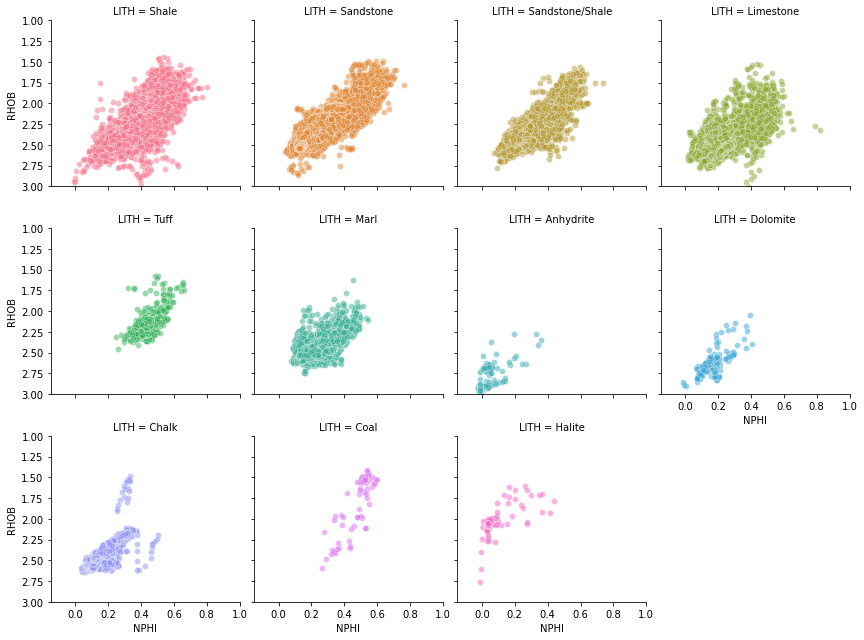

In [62]:

g = sns.FacetGrid(data, #calling the facet grid function and giving it the arguments for using our "data" df and
                  col='LITH', # orgaizing our pairplot columns by "LITH"
                  col_wrap=4, #saying wrap to the next row after 4 columns
                  hue='LITH')  # color plots by 'LITH"
g.map(sns.scatterplot, 'NPHI', 'RHOB', alpha=0.5) #Wtihint the facet grid, we want scatter plots, using NPHI and RHOB and adding some transparency to the points with alpha=0.5
g.set(xlim=(-0.15, 1)) #setting the x limit
g.set(ylim=(3, 1)) #setting the y limit

These are very helpful plots to start thinking about next steps in analysis we want to do!

How about we use the same code, but now organize those plots by well and we can see if we have some well to well variation in the presence of lithologies and different NPHI vs. RHOB distributions?

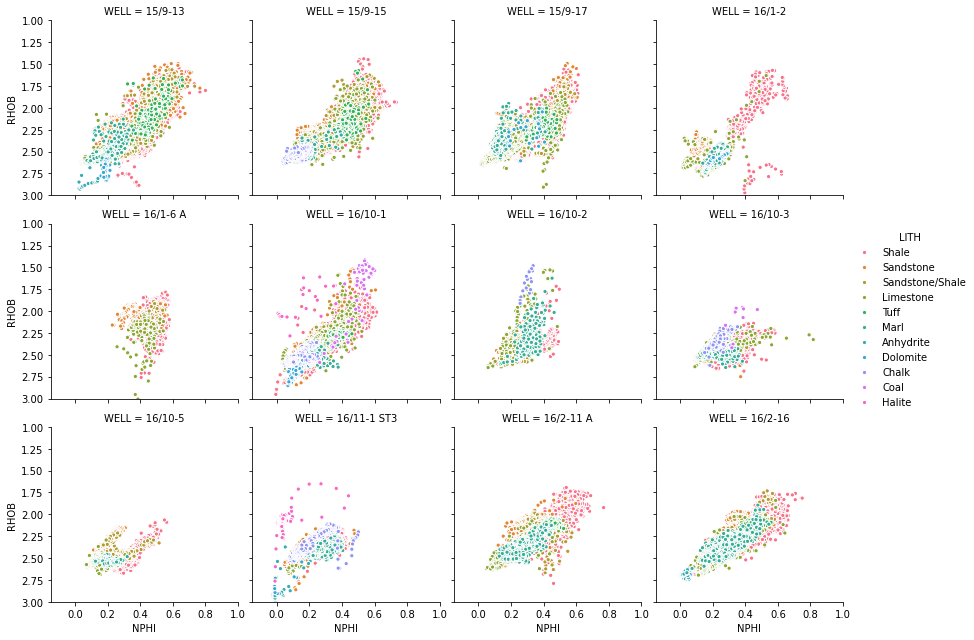

In [65]:
g = sns.FacetGrid(data, col='WELL', hue='LITH', col_wrap=4) # NOw we are organizing columns by "WELL"
g.map(sns.scatterplot, 'NPHI', 'RHOB', linewidth=1, size=0.1, marker='o') #only change here is settig the marker to a specific shape
g.set(xlim=(-0.15, 1))
g.set(ylim=(3, 1))
g.add_legend()

# Introduction to NumPy

- Python is not initially designed for numerical computing so it's computationaly inefficient
- Numpy is critical for scientific computing 
- 

Let's look at some quick comparisons:

Python lists:
- no support for vectorized operation
- no fixed type elements
- for loops inefficient (each loop, each data type needs to be checked)

NumPy arrways:
- have fixed data types
- supports vectorized operations
- operations work directly on vectors and arrays so much less need for loops